                        # Lending Club Exploratory Data Analysis Case Study
                            By Gopinath Moganasundaram and Mir Riaz Ahmed

## Introduction

### Problem Statement
The data set given (loan.csv) contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to analyze the data and identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 
In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Approach
The approach is to load the data, clean it up, perform EDA concepts on the data and then derive conclusion/recommendations on the driving factors behind loan defaults

## Data Loading

In [1]:
# Import needed libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the data
loan_df = pd.read_csv('loan.csv')
loan_df.shape

(39717, 111)

In [3]:
# Check top 5 rows to understand columns and the kind of data that is present
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

### Removing null columns

##### Remove columns which have all nulls
We can use mean on isnull to check if there are columns who have nulls in all the rows. 
Mean% = 100 means all the records in the column are null. We can remove those columns from the dataframe.

In [4]:
loan_df.isnull().mean().sort_values()*100

id                              0.0
earliest_cr_line                0.0
inq_last_6mths                  0.0
open_acc                        0.0
pub_rec                         0.0
                              ...  
avg_cur_bal                   100.0
bc_open_to_buy                100.0
bc_util                       100.0
mo_sin_old_rev_tl_op          100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
# There are columns which have 100% nulls. Drop those columns and then check the shape
loan_df = loan_df.dropna(axis=1, how='all')
loan_df.shape

(39717, 57)

#### Remove columns which have more than 40% of nulls
Now that we removed columns with 100% nulls, lets check columns which have a lot of nulls but not 100%. We can check the null percentage of columns and remove columns with more than 40% nulls

In [6]:
# checking mean on isnull for all columns
loan_df.isnull().mean().sort_values().tail(10)*100

collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
last_pymnt_d                   0.178765
pub_rec_bankruptcies           1.754916
emp_length                     2.706650
emp_title                      6.191303
desc                          32.580507
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
next_pymnt_d                  97.129693
dtype: float64

In [7]:
# Removing columns mths_since_last_delinq, mths_since_last_record, next_pymnt_d
loan_df = loan_df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)
loan_df.shape

(39717, 54)

#### Remove columns with NA
Lets now check columns with NA and remove them

In [8]:
# checking mean on isna for all columns
loan_df.isna().mean().sort_values().tail(10)*100

title                          0.027696
tax_liens                      0.098195
revol_util                     0.125891
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
last_pymnt_d                   0.178765
pub_rec_bankruptcies           1.754916
emp_length                     2.706650
emp_title                      6.191303
desc                          32.580507
dtype: float64

In [9]:
# Removing column 'desc'
loan_df = loan_df.drop('desc', axis=1)
loan_df.shape

(39717, 53)

#### Remove columns which have same values for all rows
Let's figure out those columns with nunique and remove them

In [10]:
loan_df.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64

In [11]:
loan_df = loan_df.drop(['delinq_amnt','application_type', 'policy_code', 'initial_list_status', 'acc_now_delinq', 'pymnt_plan'], axis=1)
loan_df.shape

(39717, 47)

#### Remove irrelevant columns
Now let's figure out columns that are not relevant to our analysis and remove them

In [12]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [13]:
# The id columns are not needed for analysis
irrelevant_columns = ['id', 'member_id']
# Other irrelevant columns
irrelevant_columns.append('url')
irrelevant_columns.append('collections_12_mths_ex_med')
irrelevant_columns.append('tax_liens')
irrelevant_columns.append('chargeoff_within_12_mths')
irrelevant_columns.append('last_pymnt_d')
irrelevant_columns.append('pub_rec_bankruptcies')
irrelevant_columns.append('revol_util')

# remove irrelevant columns
loan_df =  loan_df.drop(irrelevant_columns, axis=1)
loan_df.shape

(39717, 38)

#### Remove Duplicate Rows

In [14]:
# Check if there are any duplicate rows and remove them
print("Duplicate rows: ", loan_df[loan_df.duplicated()].shape)
# No duplicate rows found

loan_df.shape

Duplicate rows:  (0, 38)


(39717, 38)

#### Remove records where status = 'Current'

In [15]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Correct the data type of the columns

In [16]:
# Correct data types of int_rate column
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'].apply(lambda x : x.split('%')[0]))
loan_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16


#### Removing outliers

<Axes: >

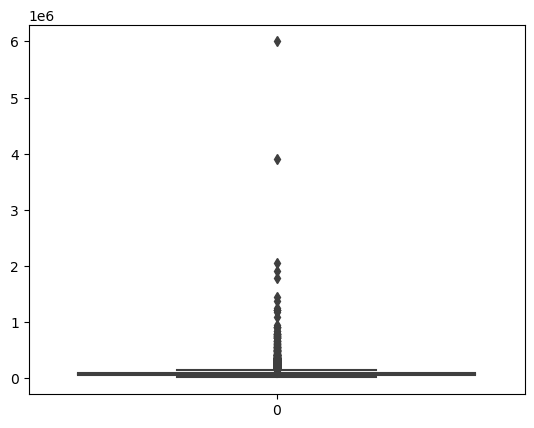

In [17]:
# Checking outlier for annual_inc
sb.boxplot(loan_df['annual_inc'])

<Axes: >

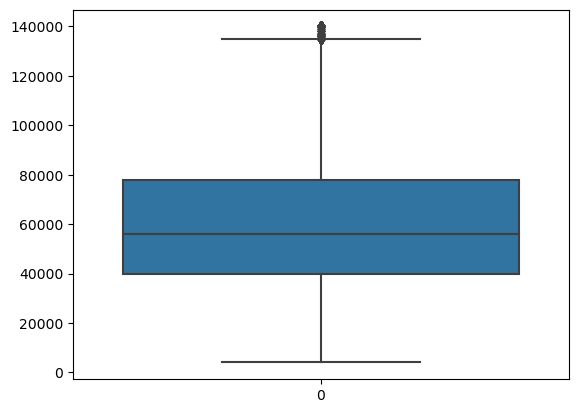

In [18]:
# Removing outliers beyond 95 percentile
loan_df = loan_df[loan_df.annual_inc <= loan_df['annual_inc'].quantile(0.95)]
sb.boxplot(loan_df['annual_inc'])

## Univariate Analysis


#### Understand loan status column

<Axes: xlabel='loan_status', ylabel='count'>

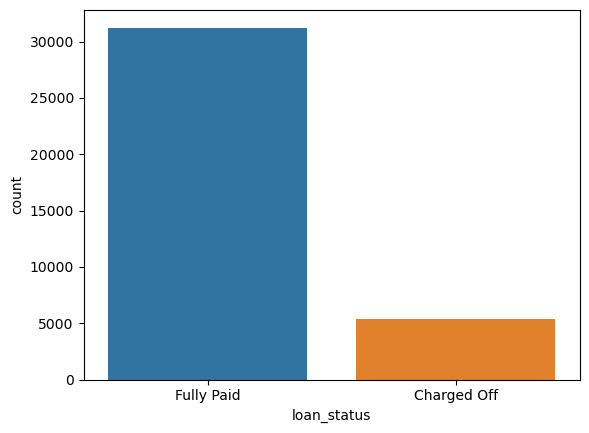

In [19]:
sb.countplot(x = 'loan_status', data = loan_df)

#### Analyze Grade with defaults

<Axes: xlabel='grade', ylabel='count'>

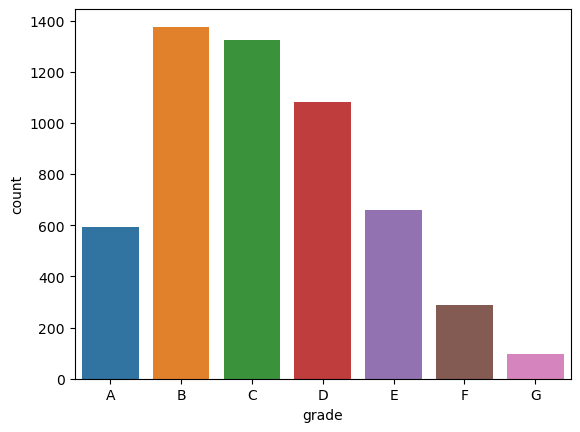

In [20]:
sb.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Analyzing home_ownership with defaults

In [21]:
# checking unique values for home_ownership
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [22]:
# replacing 'NONE' with 'OTHER'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

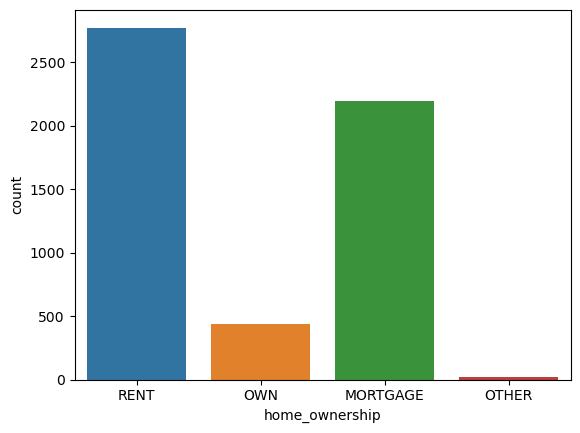

In [23]:
# Plotting home_ownership
sb.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing purpose with defaults

<Axes: xlabel='count', ylabel='purpose'>

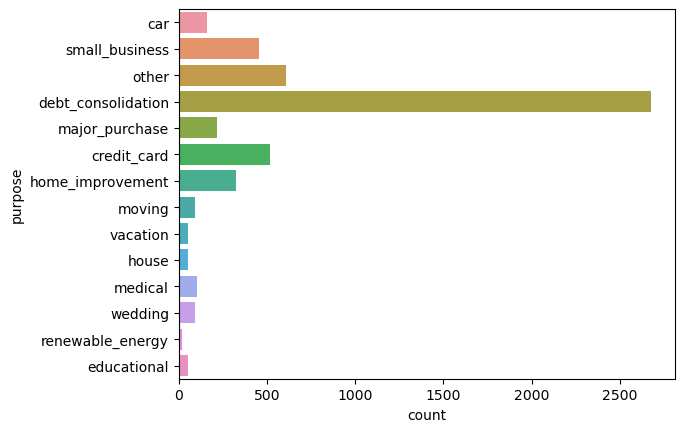

In [24]:
sb.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Analyzing emp_length with defaults

<Axes: xlabel='emp_length', ylabel='count'>

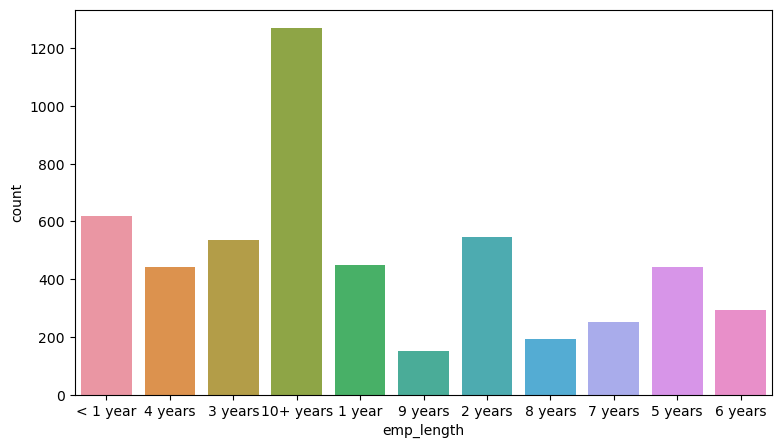

In [25]:
fig, ax = plt.subplots(figsize = (9,5))
sb.countplot(x='emp_length', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Analyzing interest rate with defaults

<Axes: xlabel='int_rate_groups', ylabel='count'>

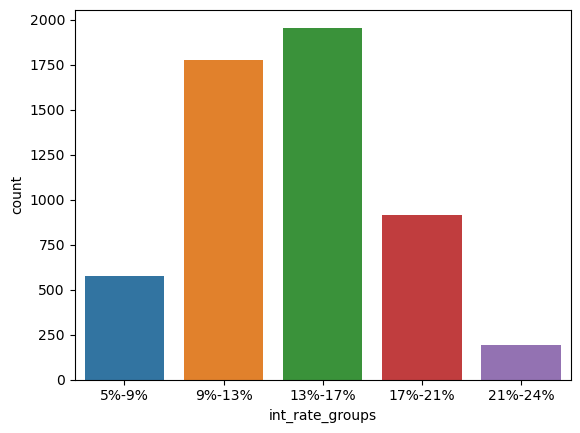

In [26]:
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
sb.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Analyzing annual income with defaults

<Axes: xlabel='annual_inc_groups', ylabel='count'>

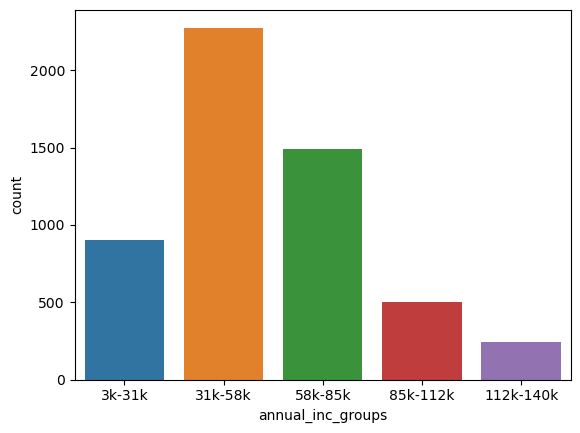

In [27]:
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sb.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Analyzing term with defaults

<Axes: xlabel='count', ylabel='term'>

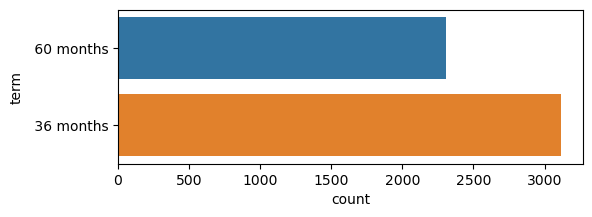

In [28]:
fig, ax = plt.subplots(figsize = (6,2))
sb.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing verification status with defaults

<Axes: xlabel='verification_status', ylabel='count'>

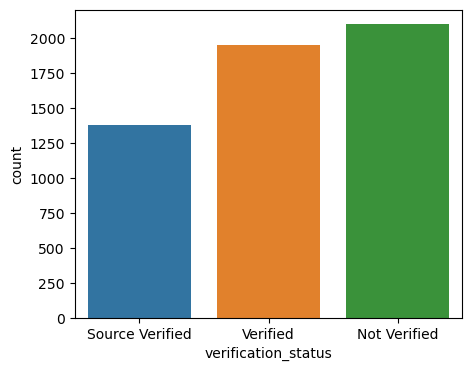

In [29]:
fig, ax = plt.subplots(figsize = (5,4))
sb.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing last 6 months income with defaults

<Axes: xlabel='inq_last_6mths', ylabel='count'>

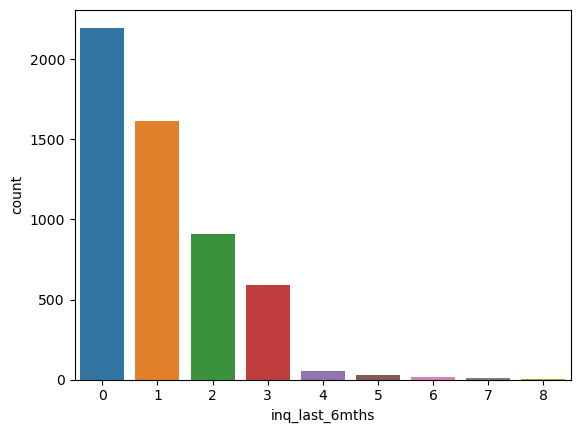

In [30]:
#fig,ax = plt.subplots(figsize = (10,8))
#ax.set_yscale('log')
sb.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing deregatory public records with defaults

<Axes: xlabel='pub_rec', ylabel='count'>

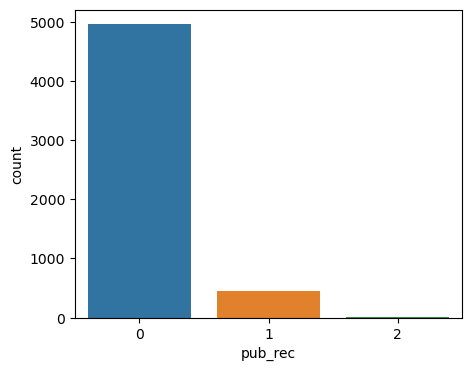

In [31]:
fig,ax = plt.subplots(figsize = (5,4))
#ax.set_yscale('log')
sb.countplot(x='pub_rec', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing loan amount with defaults

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

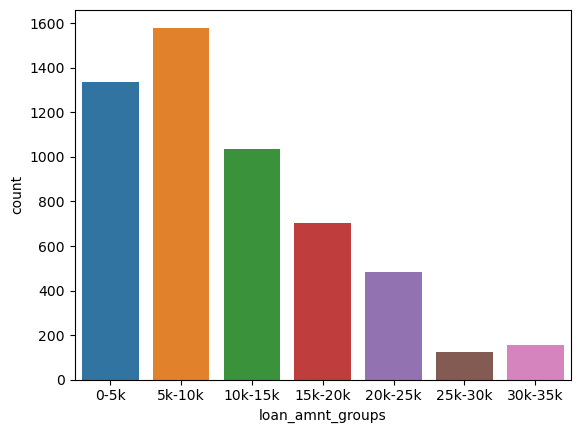

In [32]:
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sb.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analzying funded amount with defaults

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

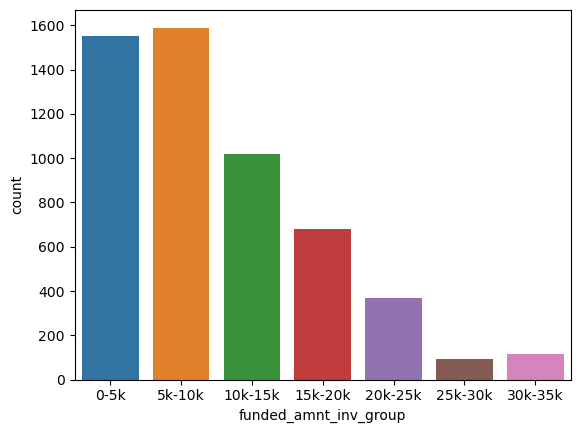

In [33]:
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sb.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing installments with defaults

<Axes: xlabel='installment_groups', ylabel='count'>

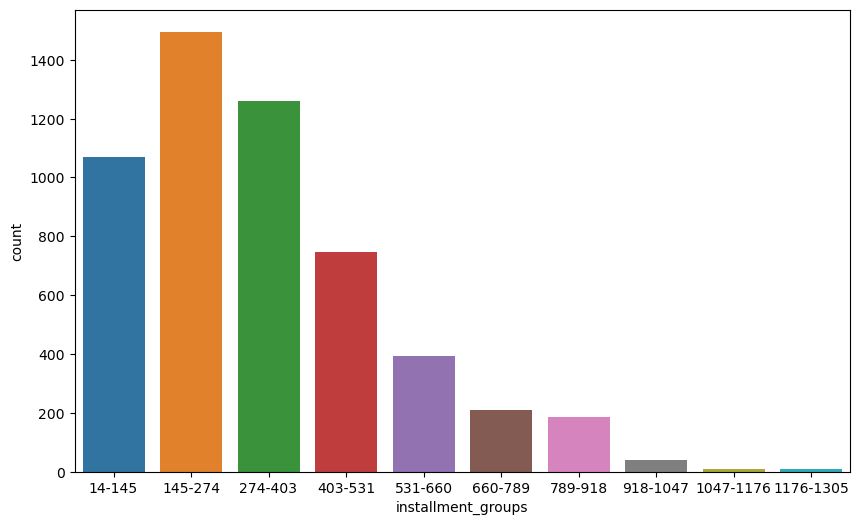

In [34]:
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
fig,ax = plt.subplots(figsize = (10,6))
sb.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

## Univariate Analysis - Observations

The above visualizations of individual columns with loan_status suggests the following.

There is a higher possibilty of loan default when
- the applicants are having a house_ownership as 'RENT'
- the loan status is not verified
- the applicants get loans to clear other debts
- the loan amount is in the range of 5k-10k
- the interest rate is in the range of 13-17%
- the number of enquiries in the last 6 months is 0
- the employment length is 10+ years
- the funded amount by investor is 5k-10k
- the monthly installment is between 145-274
- the term is 60 months
- the open_acc is 20-37

## Bivariate Analysis

#### Analyzing loan_amount with purpose

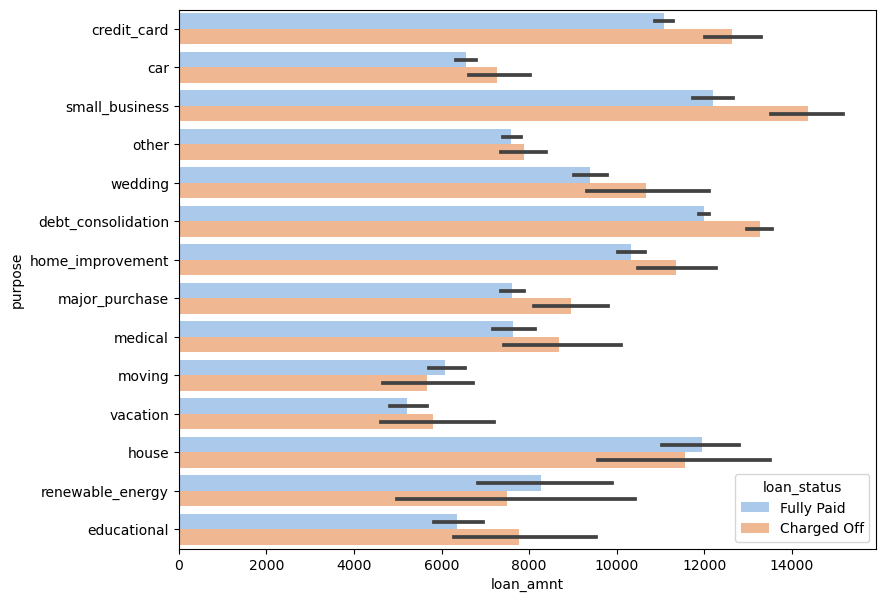

In [35]:
plt.figure(figsize=(9,7))
sb.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Analyzing loan amount with house ownership

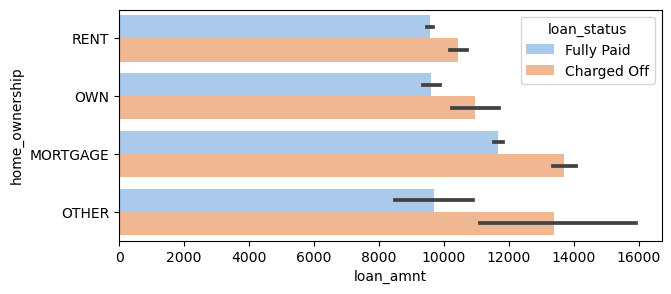

In [36]:
plt.figure(figsize=(7,3))
sb.barplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Analyzing income with house ownership

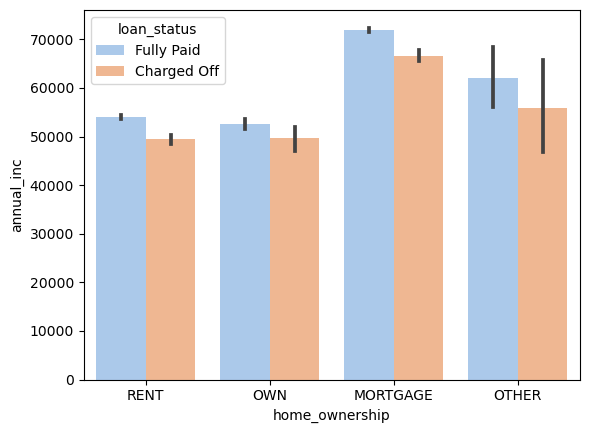

In [37]:
sb.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Analyzing loan amount with verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

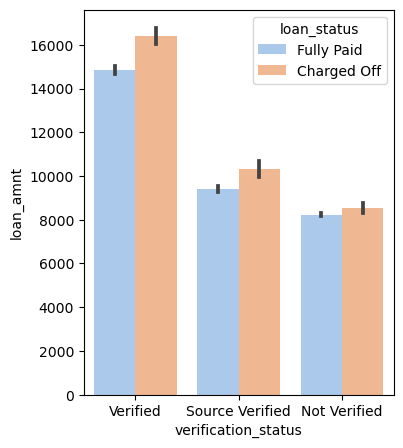

In [38]:
plt.figure(figsize=(4,5))
sb.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

#### Analyzing loan amount with emp_length

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

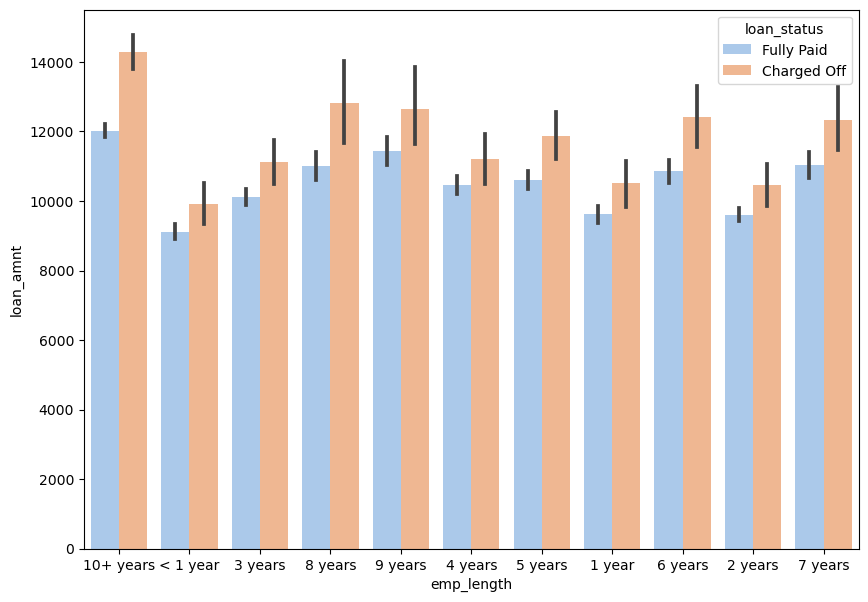

In [39]:
plt.figure(figsize=(10,7))
sb.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")

#### Analyzing term and loan amount

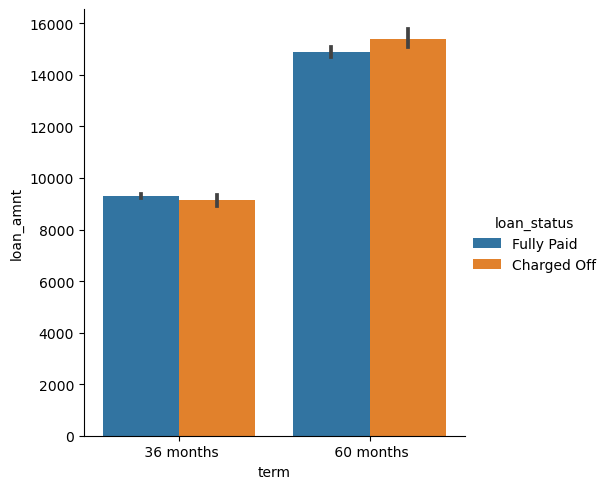

In [40]:
sb.catplot(x = 'term', y = 'loan_amnt', data = loan_df,hue = 'loan_status', kind = 'bar')

## Bivariate Analysis - Observations

From the analysis above, we can come to the below recommendations.

There is a higher possibility of loan defaults when
- the loan is verified and loan amount is above 16k
- the loan is for 'home improvement' and the income is in the range of 60k -70k
- the applicant's home ownership is 'MORTGAGE and income is in the range of 60-70k
- the applicant's home ownership is 'MORTGAGE and the loan amount is 14-16k
- the applicant takes loan for small business and the loan amount is greater than 14k
- the employment length is 10yrs and loan amount is 12k-14k 
